In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [7]:
data = pd.read_csv("water_potability.csv")
data.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [3]:
data.shape

(3276, 10)

In [4]:
print(data.isnull().sum())


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [5]:
data=data.fillna(data.mean())
data.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [7]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.396293     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

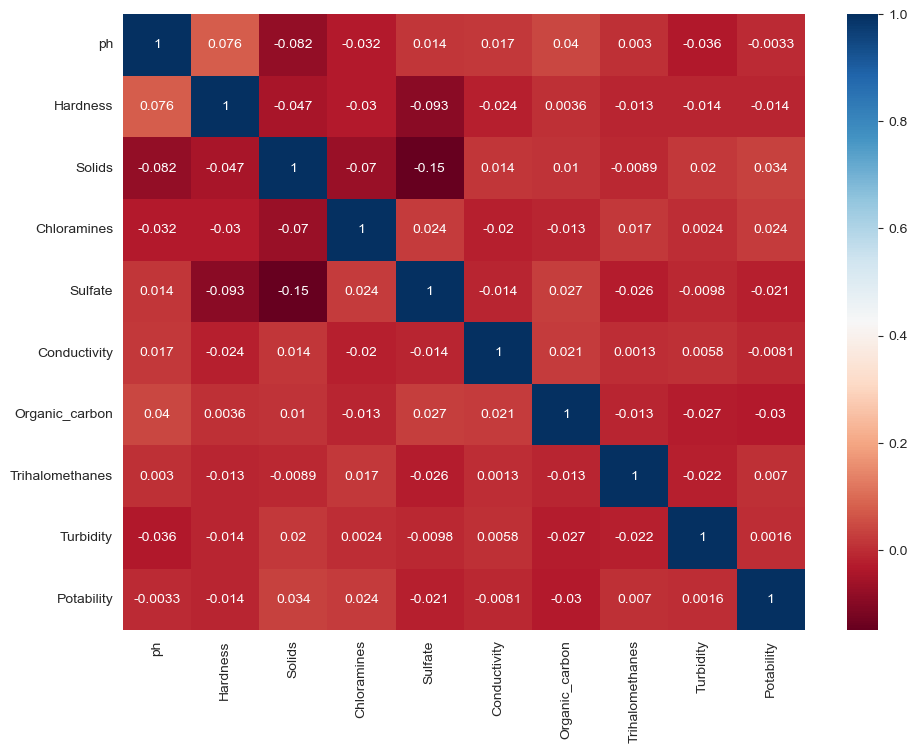

In [8]:
corr = data.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="RdBu",annot=True)
plt.show()

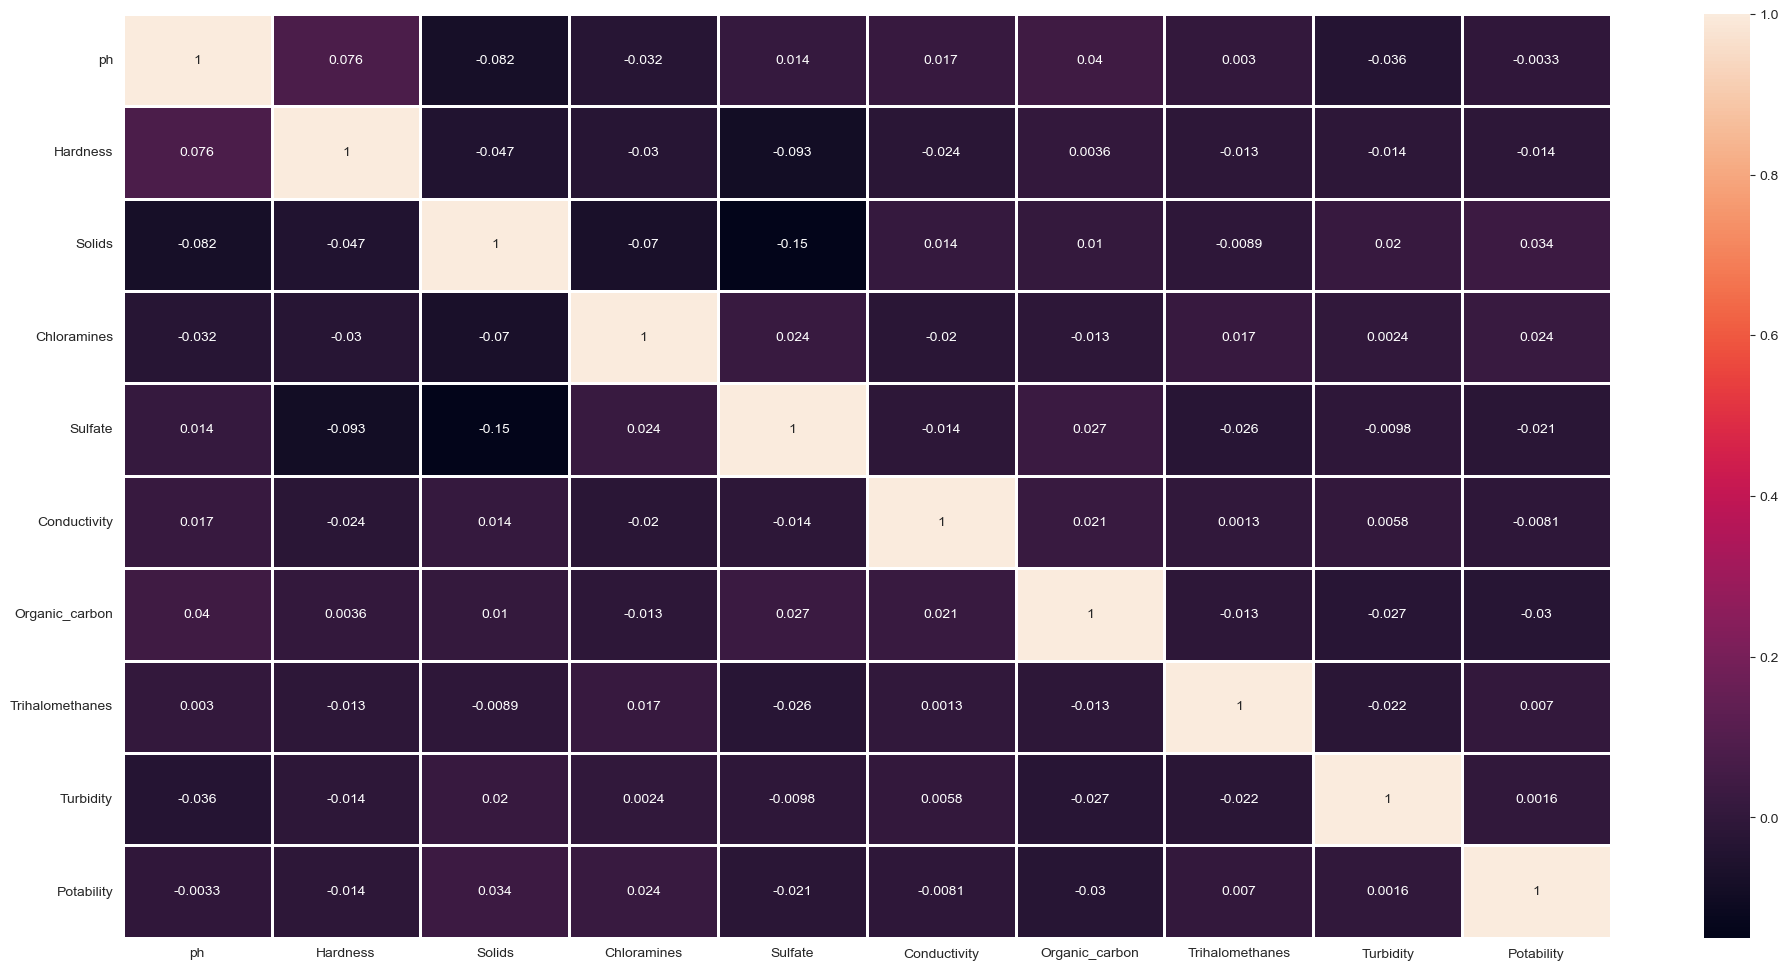

In [9]:
plt.figure(figsize = (24, 12))
corr = data.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [10]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<AxesSubplot:>

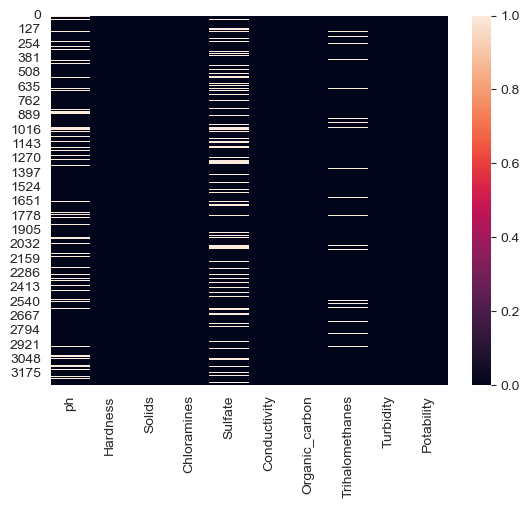

In [8]:
sns.heatmap(data.isnull())

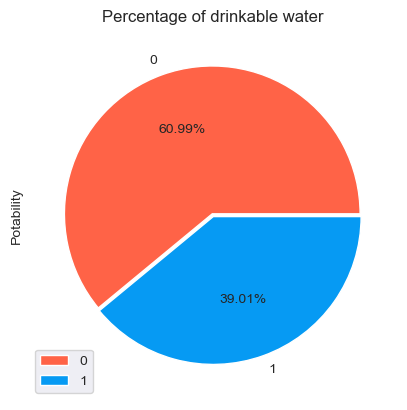

In [127]:
color=['#FF6347','#069AF3']
explode=[0.01,0.01]
data['Potability'].value_counts().plot(kind='pie',explode=explode,colors=color, autopct='%1.2f%%')
plt.title("Percentage of drinkable water")
plt.legend()

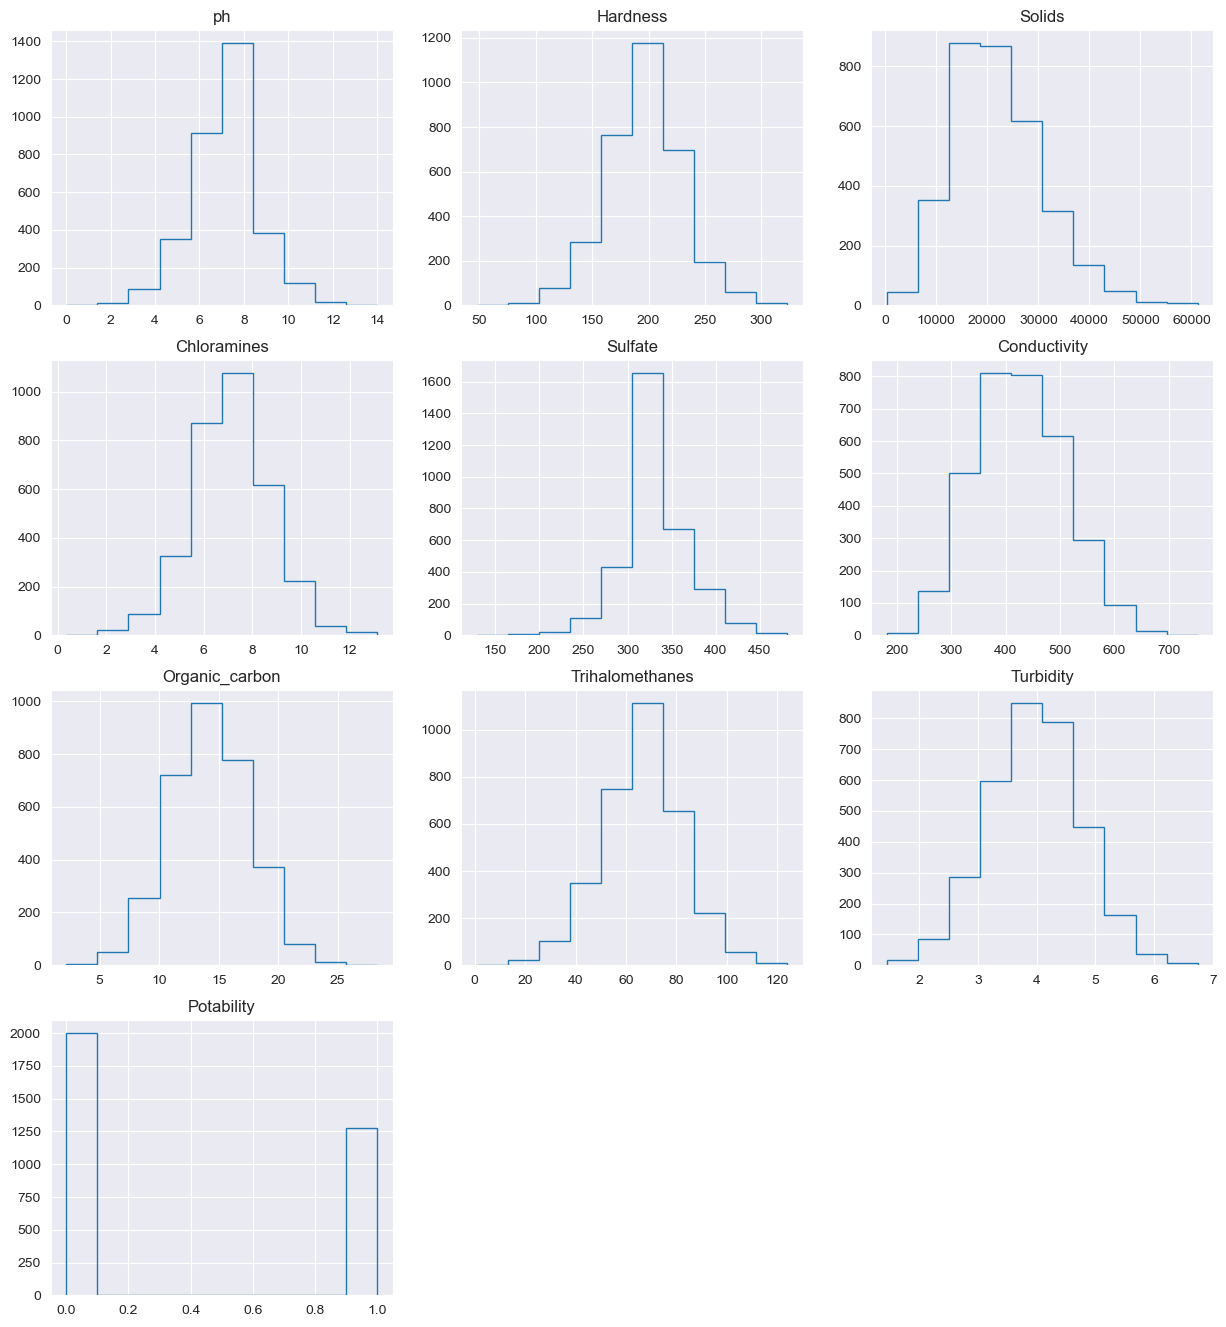

In [145]:
i=1
plt.figure(figsize=(15,25))
for col in data.columns:
    plt.subplot(6, 3, i)
    plt.hist(data[col], label=col, histtype = 'step')
    plt.title(col)
    i += 1

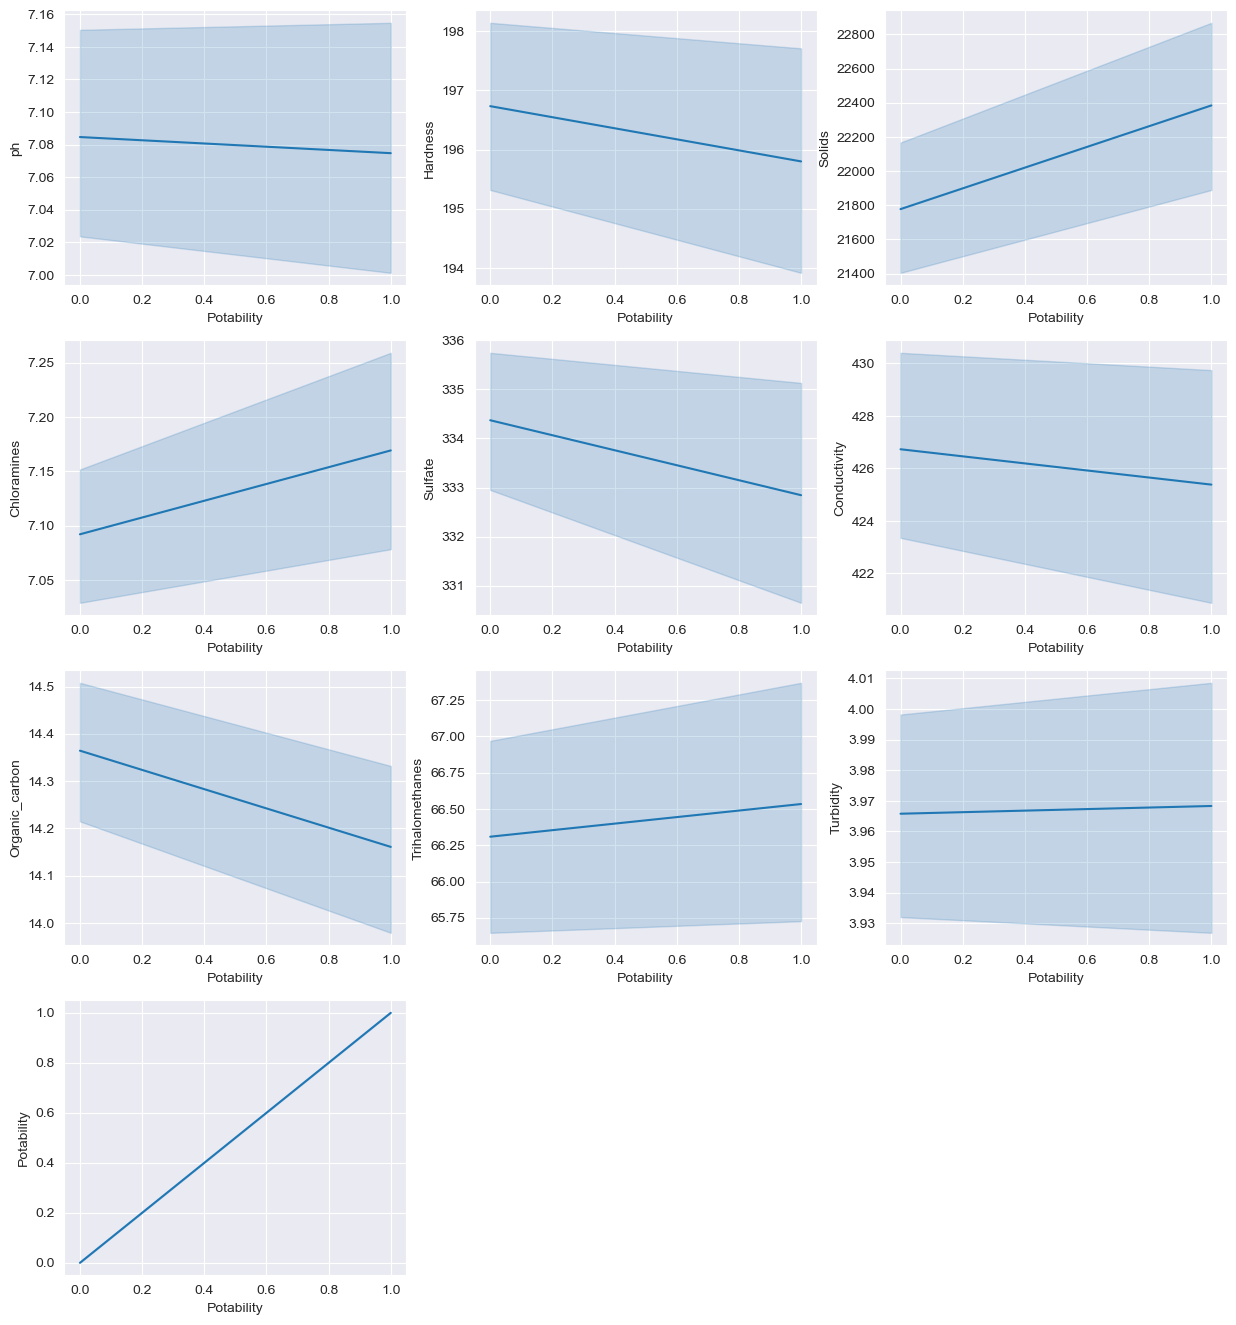

In [118]:
i = 1
plt.figure(figsize = (15,25))
for features in data.columns:
    plt.subplot(6,3,i)
    sns.lineplot(y = data[features], x= data.Potability)
    i+=1

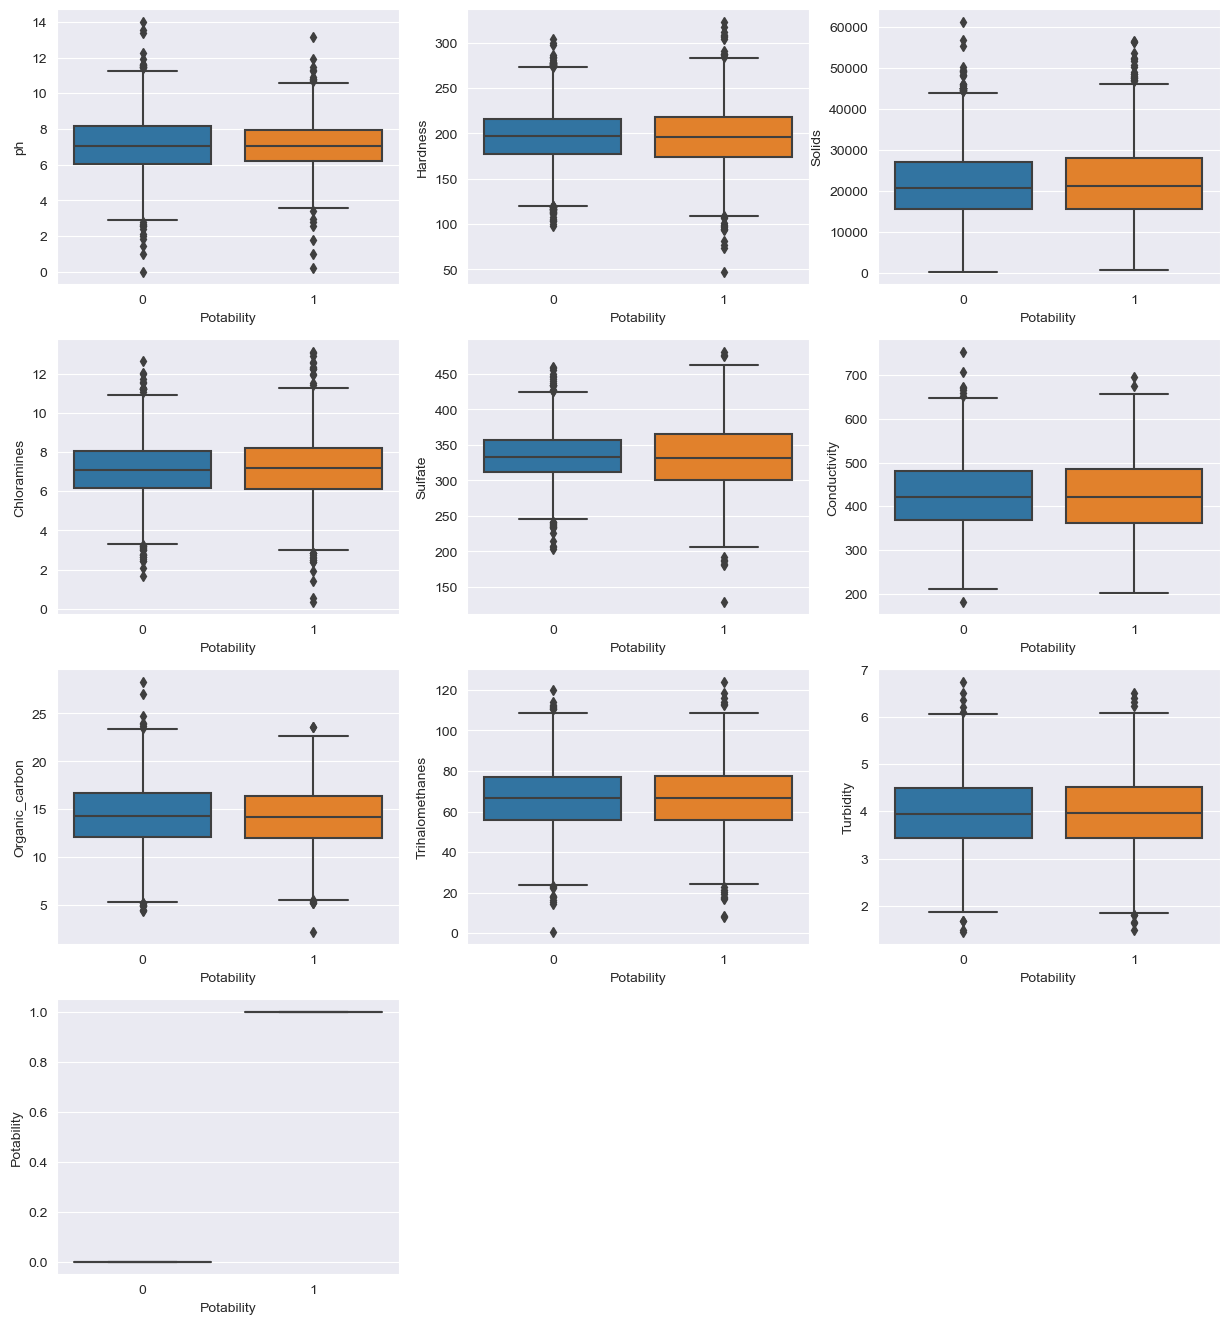

In [28]:
#Boxplots
i = 1
plt.figure(figsize = (15,25))
for features in data.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y = data[features], x= data.Potability)
    i+=1

In [12]:
x = data.loc[:, data.columns != 'Potability']
x

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076   4.500656  
2       418.606213       16.868637        66.420093   3.055934  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
...            ...             ...              ...        ...  
3271    526.424171       13.894419        66.687695   4.435821  
3272    392.449580       19.903225        66.396293   2.798243  
3273    432.044783       11.039070        69.845400   3.298875  
3274    402.883113       11.168946        77.488213   4.708658  
3275    327.459760       16.140368        78.698446   2.309149  

[3276 rows x 9 columns]

In [13]:
scaler=preprocessing.StandardScaler().fit(x)
X_std = scaler.transform(x)
X_std

array([[-1.02733269e-14,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_std)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[1.20081405 1.13724136]
[0.13338306 0.12632158]


In [15]:
loading= pd.DataFrame(pca.components_,columns =x.columns.values[:])
loading= loading.transpose()
loading=loading.abs()
loading.sort_values(by=0,ascending=False)

0         1
Solids           0.669280  0.057273
Sulfate          0.586623  0.307763
ph               0.315065  0.552552
Chloramines      0.254096  0.321356
Turbidity        0.162873  0.240940
Organic_carbon   0.105816  0.199926
Conductivity     0.078754  0.054242
Hardness         0.010200  0.626447
Trihalomethanes  0.008746  0.004348

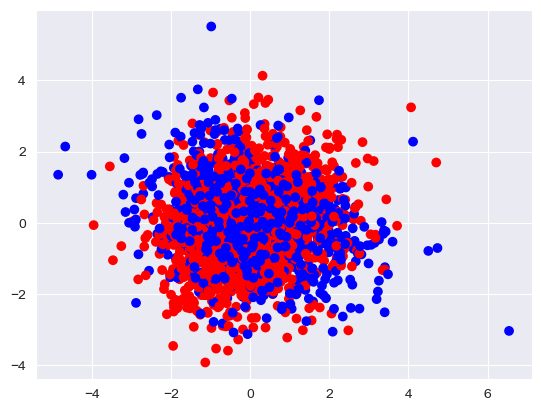

In [17]:
X_reduced = pca.transform(X_std)
colors = { 0:'red', 1:'blue'}
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=data.Potability.map(colors))

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

X = X_std[:]
y = data.loc[:, data.columns == 'Potability']
X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [92]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

coefficients = np.column_stack((np.asarray(x.iloc[:].columns), LogReg.coef_.flatten()))
print(coefficients)

              precision    recall  f1-score   support

           0       0.61      1.00      0.75       593
           1       1.00      0.01      0.02       390

    accuracy                           0.61       983
   macro avg       0.80      0.50      0.38       983
weighted avg       0.76      0.61      0.46       983

[['ph' 0.0036708244141488997]
 ['Hardness' -0.019866531286541086]
 ['Solids' 0.03123660841263743]
 ['Chloramines' 0.07401745121886134]
 ['Sulfate' -0.08187030643344163]
 ['Conductivity' -0.013229716798772452]
 ['Organic_carbon' -0.08616224560316724]
 ['Trihalomethanes' 0.03346768512512819]
 ['Turbidity' 0.02077598023775889]]


/Users/mr.angelo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
from sklearn.naive_bayes import GaussianNB
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train, y_train)
y_pred = Naive_Bayes.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       593
           1       0.65      0.37      0.47       390

    accuracy                           0.67       983
   macro avg       0.66      0.62      0.62       983
weighted avg       0.67      0.67      0.65       983



/Users/mr.angelo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/var/folders/07/k2t7ttjx24vgtnz5b1qlyf4r0000gn/T/ipykernel_22909/91627862.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


              precision    recall  f1-score   support

           0       0.68      0.87      0.76       593
           1       0.66      0.38      0.48       390

    accuracy                           0.68       983
   macro avg       0.67      0.62      0.62       983
weighted avg       0.67      0.68      0.65       983



<AxesSubplot:>

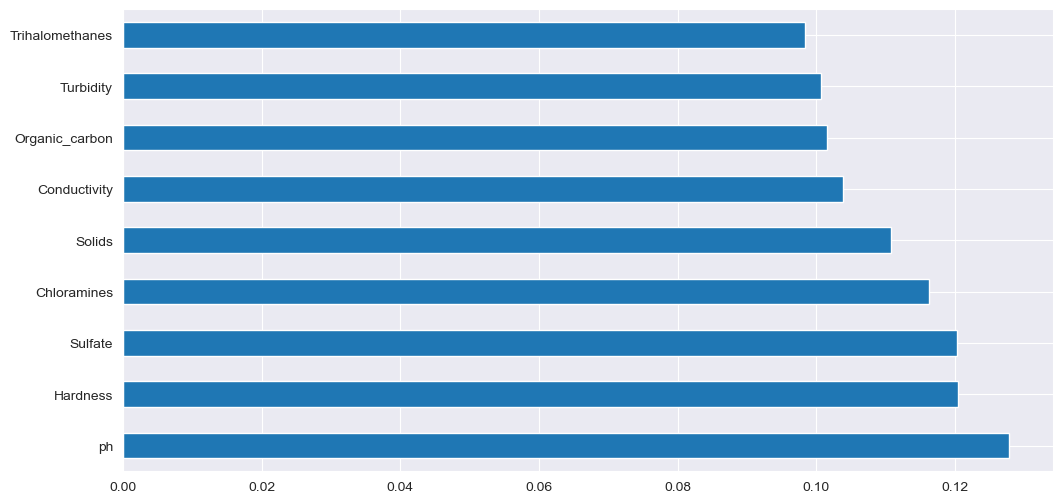

In [104]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=300)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
print(classification_report(y_test, Y_pred))

plt.figure(figsize=(12,6))
feat_importances = pd.Series(random_forest.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [100]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
Y_pred = clf.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.65      0.62      0.64       593
           1       0.46      0.50      0.48       390

    accuracy                           0.57       983
   macro avg       0.56      0.56      0.56       983
weighted avg       0.58      0.57      0.57       983

